# k-Nearest Neighbors (k-NN)

In [42]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.ticker import PercentFormatter
from sklearn.neighbors import KNeighborsRegressor

Import OSNIR Dataset and shuffle data

In [43]:
# import OSNIR dataset
df = pd.read_csv('../Data/OSNIR_values_extendedv3_new datasetbcsv.csv')
# shuffling rows of OSNIR dataframe and reset indexes
df = df.sample(frac=1)
df.reset_index(inplace=True, drop=True)

Divide data into\
1800 values for training (0,1800-1)\
600 values for validation (1800,2400-1)\
600 values for testing (2400,3000-1)\

In [44]:
data = np.array(df)
# input x aka Ns, Pch, L, B, GB, Nch values
x_train = data[0:1800-1, 1:7]
x_valid = data[1800:2400-1, 1:7]
x_test = data[2400:3000-1, 1:7]

# output y aka OSNIR values
y_train = data[0:1800-1, 0]
y_valid = data[1800:2400-1, 0]
y_test = data[2400:3000-1, 0]

#### Create the k-Nearest Neighbors Model

In [45]:
model = KNeighborsRegressor(n_neighbors=15, weights='distance')
model.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=15, weights='distance')

In [46]:
OSNIR_num = data[:3000-1,0]
Input_num = data[:3000-1,1:7]

In [47]:
OSNIR_est = (model.predict(Input_num))

In [48]:
for i in range(10):
    print('%s => %f (expected %f)' % (Input_num[i].tolist(), OSNIR_est[i], OSNIR_num[i] ))

[13.0, -8.0, 5.0, 25.0, 0.0, 9.0] => 28.590533 (expected 28.590533)
[46.0, 0.0, 10.0, 25.0, 0.0, 15.0] => 15.784822 (expected 15.784822)
[16.0, -4.0, 10.0, 25.0, 0.0, 9.0] => 26.722386 (expected 26.722386)
[37.0, -2.0, 50.0, 25.0, 0.0, 3.0] => 17.175887 (expected 17.175887)
[17.0, -10.0, 10.0, 25.0, 0.0, 9.0] => 24.807132 (expected 24.807132)
[6.0, -2.0, 50.0, 25.0, 0.0, 9.0] => 24.815000 (expected 24.815000)
[8.0, -3.0, 10.0, 12.5, 0.0, 9.0] => 25.222234 (expected 25.222234)
[17.0, -7.0, 50.0, 25.0, 0.0, 3.0] => 19.462172 (expected 19.462172)
[5.0, -9.0, 10.0, 25.0, 0.0, 9.0] => 30.236325 (expected 30.236325)
[11.0, -2.0, 100.0, 25.0, 0.0, 9.0] => 15.581198 (expected 15.459156)


In [49]:
Mism = np.zeros(3000-1)
for i in range(3000-1):
    Mism[i] = OSNIR_num[i] - OSNIR_est[i]

In [50]:
pred_df = pd.DataFrame({"Actual OSNIR (dB)" : OSNIR_num.tolist(), "Predicted OSNIR (dB)" : OSNIR_est.tolist(), "Difference (dB)" : Mism.tolist()})
pred_df.to_csv("OSNIR_Prediction_kNN.csv",index=False)

(array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.33444481e-04,
        3.33444481e-04, 3.00100033e-03, 1.53384461e-02, 3.73457819e-02,
        6.56885629e-02, 7.83927976e-01, 6.73557853e-02, 1.03367789e-02,
        6.00200067e-03, 4.33477826e-03, 2.33411137e-03, 0.00000000e+00,
        6.66888963e-04, 6.66888963e-04, 3.33444481e-04, 1.33377793e-03,
        0.00000000e+00, 0.00000000e+00, 3.33444481e-04, 0.00000000e+00,
        3.33444481e-04, 0.00000000e+00, 0.00000000e+00]),
 array([-10.        ,  -9.42857143,  -8.85714286,  -8.28571429,
         -7.71428571,  -7.14285714,  -6.57142857,  -6.        ,
         -5.42857143,  -4.85714286,  -4.28571429,  -3.71428571,
         -3.14285714,  -2.57142857,  -2.        ,  -1.42857143,
         -0.85714286,  -0.28571429,   0.28571429,   0.85714286,
          1.42857143,   2.        ,   2.571428

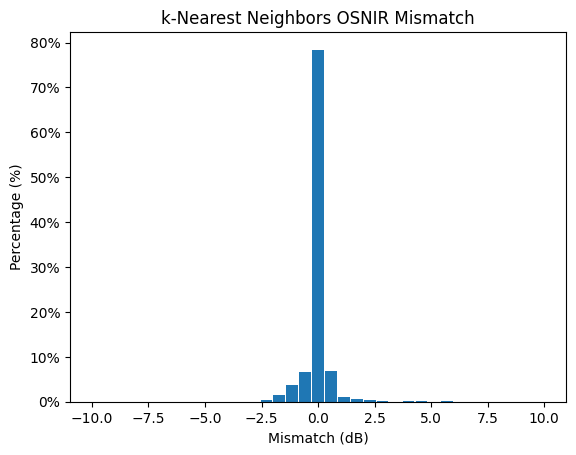

In [51]:
plt.title('k-Nearest Neighbors OSNIR Mismatch')
plt.xlabel('Mismatch (dB)')
plt.ylabel('Percentage (%)')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.hist(Mism, range=(-10,10), rwidth=0.9, bins=35, weights=np.ones(len(Mism))/len(Mism))